# **Calculating Eigenvalues and Eigenvectors- Calculate the eigenvalues and eigenvectors of a matrix.**

In [ ]:
import numpy as np

# Example matrix
matrix = np.array([[1, 2], [3, 4]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(matrix)

print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[-0.37228132  5.37228132]

Eigenvectors:
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


# **Calculate the singular value decomposition (SVD) of a matrix.**

In [ ]:
import numpy as np

# Example matrix
matrix = np.array([[1, 2], [3, 4]])

# Calculate SVD
U, S, V = np.linalg.svd(matrix)

print("U (Left singular vectors):")
print(U)

print("\nS (Singular values):")
print(S)

print("\nV^T (Right singular vectors):")
print(V)


U (Left singular vectors):
[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]

S (Singular values):
[5.4649857  0.36596619]

V^T (Right singular vectors):
[[-0.57604844 -0.81741556]
 [ 0.81741556 -0.57604844]]


# **Implement Principle Component Analysis (PCA).**

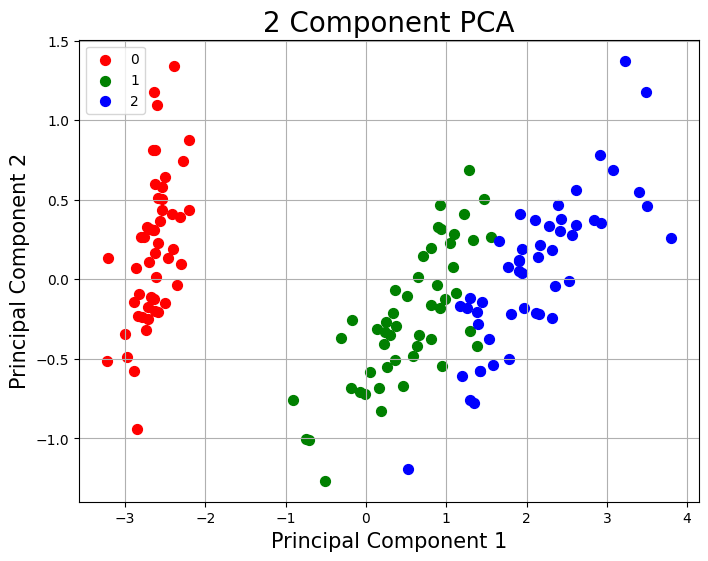

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
columns = iris.feature_names

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principalComponents = pca.fit_transform(data)

# Create a DataFrame with the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
targetDf = pd.DataFrame(data=target, columns=['target'])
finalDf = pd.concat([principalDf, targetDf], axis=1)

# Visualize the PCA results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(
        finalDf.loc[indicesToKeep, 'PC1'],
        finalDf.loc[indicesToKeep, 'PC2'],
        c=color,
        s=50
    )

ax.legend(targets)
ax.grid()
plt.show()


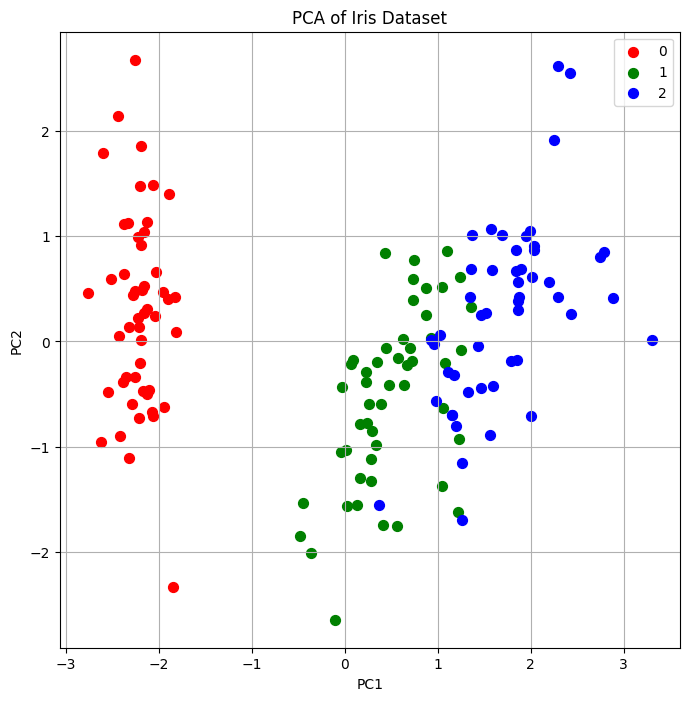

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
# Load the iris dataset
iris = load_iris()
# Convert the iris dataset to a Pandas DataFrame
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
# Standardize the data
X_std = (X - X.mean()) / X.std()
# Create a PCA object and specify the number of components to keep
pca = PCA(n_components=2)
# Fit the PCA object to the standardized data
pca.fit(X_std)
# Transform the data to its principal components
X_pca = pca.transform(X_std)
# Create a new Pandas DataFrame with the transformed data
principal_components_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_components_df, pd.DataFrame(y, columns=['target'])], axis=1)
# Plot the principal components
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA of Iris Dataset')
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
 indices_to_keep = final_df['target'] == target
 ax.scatter(final_df.loc[indices_to_keep, 'PC1'],
 final_df.loc[indices_to_keep, 'PC2'],
 c=color,
 s=50)
ax.legend(targets)
ax.grid()
plt.show()


# **Multilabel classification- Implement multilabel classification.**

In [ ]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Generate a random multilabel classification dataset
X, y = make_multilabel_classification(n_samples=1000, n_features=10, n_classes=3, n_labels=2)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Create a KNeighborsClassifier for multilabel classification
clf = MultiOutputClassifier(KNeighborsClassifier())
# Train the classifier on the training set
clf.fit(X_train, y_train)
# Predict the labels of the test set
y_pred = clf.predict(X_test)
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.54


# **Implement page rank algorithm**

In [ ]:
import networkx as nx

# Create a graph (example)
G = nx.DiGraph()
edges = [(1, 2), (1, 3), (2, 3), (3, 1)]
G.add_edges_from(edges)

# Calculate PageRank
pagerank = nx.pagerank(G)

print("PageRank values:")
print(pagerank)


PageRank values:
{1: 0.387789442707259, 2: 0.21481051315058508, 3: 0.3974000441421556}


In [ ]:
import numpy as np

def pagerank(links, damping_factor=0.85, epsilon=1e-8, max_iterations=100):
    num_pages = len(links)
    matrix = np.zeros((num_pages, num_pages))
    ranks = np.ones(num_pages) / num_pages

    for i, linked_pages in links.items():
        if len(linked_pages) == 0:
            matrix[:, i] = np.ones(num_pages) / num_pages
        else:
            matrix[:, i] = np.array([1 / len(linked_pages) if j in linked_pages else 0 for j in range(num_pages)])

    for _ in range(max_iterations):
        new_ranks = np.ones(num_pages) * (1 - damping_factor) / num_pages + damping_factor * matrix.T.dot(ranks)
        if np.linalg.norm(new_ranks - ranks) < epsilon:
            break
        ranks = new_ranks

    return ranks

# Example usage
links = {
    0: [1, 2],
    1: [2],
    2: [0, 3],
    3: [2]
}

result = pagerank(links)
print(result)


[0.25 0.25 0.25 0.25]
